In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("../../new/datasets/balanced.csv", header=None)

In [3]:
# Separamos las características y la variable objetivo
X = df.drop(df.columns[-1], axis=1)
y = df.iloc[:, -1]

In [4]:
# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [5]:
# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Prueba 1

In [6]:
# crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.Dense(30, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test))


Epoch 1/100
48/48 [==============================] - 1s 6ms/step - loss: 0.8940 - accuracy: 0.6392 - val_loss: 0.7799 - val_accuracy: 0.7100
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.7250 - val_loss: 0.6492 - val_accuracy: 0.7817
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.8071 - val_loss: 0.5361 - val_accuracy: 0.8233
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.8179 - val_loss: 0.4504 - val_accuracy: 0.8317
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8383 - val_loss: 0.3984 - val_accuracy: 0.8517
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8571 - val_loss: 0.3886 - val_accuracy: 0.8517
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8633 - val_loss: 0.3605 - val_accuracy: 0.8633
Epoch 8/100
4

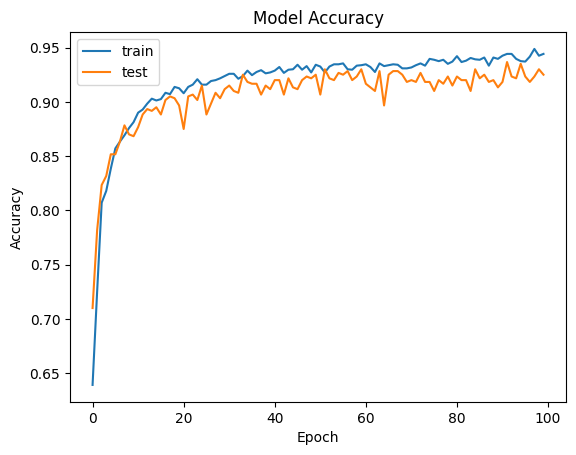

In [8]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

19/19 [==============================] - 0s 930us/step
[[194   4   2]
 [  6 168  26]
 [  1   6 193]]


In [11]:
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9652    0.9700    0.9676       200
           1     0.9438    0.8400    0.8889       200
           2     0.8733    0.9650    0.9169       200

    accuracy                         0.9250       600
   macro avg     0.9274    0.9250    0.9244       600
weighted avg     0.9274    0.9250    0.9244       600



In [12]:
# Save the model to a single file
model.save( './rna_balance_test1.keras', save_format='keras_v3')

# Prueba 2

In [13]:
# crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.Dense(30, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/100
48/48 [==============================] - 1s 6ms/step - loss: 0.7485 - accuracy: 0.7175 - val_loss: 0.5354 - val_accuracy: 0.8283
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.8117 - val_loss: 0.4681 - val_accuracy: 0.8300
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8342 - val_loss: 0.4073 - val_accuracy: 0.8600
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4048 - accuracy: 0.8450 - val_loss: 0.3819 - val_accuracy: 0.8583
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8587 - val_loss: 0.3896 - val_accuracy: 0.8417
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8679 - val_loss: 0.3840 - val_accuracy: 0.8500
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8767 - val_loss: 0.3272 - val_accuracy: 0.8883
Epoch 8/100
4

In [14]:
# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

19/19 [==============================] - 0s 933us/step
[[190   6   4]
 [  5 174  21]
 [  0   6 194]]


In [15]:
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9744    0.9500    0.9620       200
           1     0.9355    0.8700    0.9016       200
           2     0.8858    0.9700    0.9260       200

    accuracy                         0.9300       600
   macro avg     0.9319    0.9300    0.9299       600
weighted avg     0.9319    0.9300    0.9299       600



In [16]:
# Save the model to a single file
model.save( './rna_balance_test2.keras', save_format='keras_v3')

# Prueba 3

In [17]:
# crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.Dense(30, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/100
48/48 [==============================] - 1s 5ms/step - loss: 0.6873 - accuracy: 0.7075 - val_loss: 0.5166 - val_accuracy: 0.8117
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.8029 - val_loss: 0.4635 - val_accuracy: 0.8300
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.8217 - val_loss: 0.4306 - val_accuracy: 0.8400
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8325 - val_loss: 0.4224 - val_accuracy: 0.8433
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8471 - val_loss: 0.3877 - val_accuracy: 0.8617
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8537 - val_loss: 0.3729 - val_accuracy: 0.8717
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8687 - val_loss: 0.3564 - val_accuracy: 0.8650
Epoch 8/100
4

In [18]:
# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

19/19 [==============================] - 0s 894us/step
[[196   4   0]
 [  5 184  11]
 [  3  13 184]]


In [19]:
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9608    0.9800    0.9703       200
           1     0.9154    0.9200    0.9177       200
           2     0.9436    0.9200    0.9316       200

    accuracy                         0.9400       600
   macro avg     0.9399    0.9400    0.9399       600
weighted avg     0.9399    0.9400    0.9399       600



In [20]:
# Save the model to a single file
model.save( './rna_balance_test3.keras', save_format='keras_v3')

# Prueba 4

In [21]:
# crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.Dense(30, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/100
48/48 [==============================] - 1s 5ms/step - loss: 0.8441 - accuracy: 0.6429 - val_loss: 0.6641 - val_accuracy: 0.8033
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5885 - accuracy: 0.8071 - val_loss: 0.5294 - val_accuracy: 0.8167
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.8092 - val_loss: 0.4717 - val_accuracy: 0.8267
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8179 - val_loss: 0.4411 - val_accuracy: 0.8267
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8313 - val_loss: 0.4309 - val_accuracy: 0.8433
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8379 - val_loss: 0.4092 - val_accuracy: 0.8450
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8404 - val_loss: 0.4010 - val_accuracy: 0.8467
Epoch 8/100
4

In [22]:
# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

19/19 [==============================] - 0s 1ms/step
[[191   5   4]
 [  7 166  27]
 [  0   6 194]]


In [23]:
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9646    0.9550    0.9598       200
           1     0.9379    0.8300    0.8806       200
           2     0.8622    0.9700    0.9129       200

    accuracy                         0.9183       600
   macro avg     0.9216    0.9183    0.9178       600
weighted avg     0.9216    0.9183    0.9178       600



In [24]:
# Save the model to a single file
model.save( './rna_balance_test4.keras', save_format='keras_v3')